In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt  #this is used for MATLAB-like interface
# import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Step 1 Data Understanding

In [3]:
path = 'data/coaster_db.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.shape

(1087, 56)

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [7]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

### Step 2 Dataset Preparation

In [10]:
df.isna()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,False
2,False,True,True,False,False,True,False,True,True,True,...,True,True,True,True,True,True,True,True,False,True
3,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,True
4,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1083,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1084,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1085,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


In [11]:
df[['coaster_name', 
        'Manufacturer',
        'year_introduced', 
       'opening_date_clean', 
       'speed_mph', 'height_unit',
       'Inversions_clean', 'Gforce_clean']]

,coaster_name,Manufacturer,year_introduced,opening_date_clean,speed_mph,height_unit,Inversions_clean,Gforce_clean
0,Switchback Railway,LaMarcus Adna Thompson,1884,1884-06-16,6.0,ft,0,2.9
1,Flip Flap Railway,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,1896,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Anton Schwarzkopf,2022,NaN,53.0,ft,3,4.7
1083,Pantheon (roller coaster),Intamin,2022,2022-01-01,73.0,ft,2,NaN
1084,Tron Lightcycle Power Run,Vekoma,2022,2016-06-16,59.3,ft,0,4.0
1085,Tumbili,S&S – Sansei Technologies,2022,NaN,34.0,ft,0,NaN


In [12]:
df.drop(columns=['Inversions_clean'], axis=1)
# df.shape

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,NaN


In [13]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [14]:
df['opening_date_clean'].dtype

dtype('<M8[ns]')

In [15]:
df.dtypes

coaster_name                             object
Length                                   object
Speed                                    object
Location                                 object
Status                                   object
Opening date                             object
Type                                     object
Manufacturer                             object
Height restriction                       object
Model                                    object
Height                                   object
Inversions                              float64
Lift/launch system                       object
Cost                                     object
Trains                                   object
Park section                             object
Duration                                 object
Capacity                                 object
G-force                                  object
Designer                                 object
Max vertical angle                      

In [16]:
df = df.rename(columns={'coaster_name':'Coaster_Name', 
        'Manufacturer':'Manufacturer',
        'year_introduced':'Year_Introduced', 
       'opening_date_clean':'Opening_Date_Clean', 
       'speed_mph':'Speed_Mph', 'height_unit':'Height_Unit',
       'Inversions_clean':'Inversions_Clean', 'Gforce_clean':'Gforce_Clean'})

In [17]:
df.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [18]:
df.isna().sum()

Coaster_Name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [19]:
# check for duplicate coaster name
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster,...,50 mph,80 km/h,50.0,mph,50.0,77.0,ft,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train,...,35 mph,56 km/h,35.0,mph,35.0,104.0,ft,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN,...,64 km/h,40 mph,64.0,km/h,39.8,10.0,m,32.8,0,NaN


In [20]:
df.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [21]:
# This will return the rows where the Coaster_Name is 'Flip Flap Railway'
# df['Coaster_Name']=='Flip Flap Railway'
df[df['Coaster_Name']=='Crystal Beach Cyclone']

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0


In [22]:
# checking an example duplicate
df.query('Coaster_Name=="Crystal Beach Cyclone"')

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0


In [23]:
df.shape

(1087, 56)

In [24]:
df.dropna()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean


In [25]:
df.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main',
       'Opening_Date_Clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'Speed_Mph', 'height_value', 'Height_Unit', 'height_ft',
       'Inversions_Clean', 'Gforce_Clean'],
      dtype='object')

In [26]:
# check for duplicate coaster name
# df.loc[df.duplicated(subset=['Coaster_Name','Location'])]
# df.loc[df.duplicated(subset=['Coaster_Name','Location'])].reset_index()
df.loc[df.duplicated(subset=['Coaster_Name','Location'])].reset_index(drop=True)
# df = df.loc[df.duplicated(subset=['Coaster_Name','Location'])].reset_index(drop=True).copy()


,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
0,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0
1,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster,...,50 mph,80 km/h,50.0,mph,50.0,77.0,ft,NaN,0,NaN
3,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train,...,35 mph,56 km/h,35.0,mph,35.0,104.0,ft,NaN,0,NaN
4,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN,...,64 km/h,40 mph,64.0,km/h,39.8,10.0,m,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Operating,1999 as Road Runner Railway; 2021 as Lil' Devi...,Steel – Kiddie,Zamperla,NaN,Family Gravity Coaster 80STD,...,NaN,NaN,NaN,NaN,NaN,13.0,ft,NaN,0,NaN
93,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Operating,1950s,Steel,Allan Herschell Company,NaN,Little Dipper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
94,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,48[1] in (122 cm),I-Box Track,...,76 mph,122 km/h,76.0,mph,76.0,206.0,ft,NaN,2,NaN
95,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7


In [27]:
df.shape

(1087, 56)

In [28]:
df.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_Mph,height_value,Height_Unit,height_ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [29]:
df.shape

(1087, 56)

### Step 3 Feature Understanding

Plotting Feature Distribution
    . Histogram
    . KDE
    . BoxPlot

Text(0, 0.5, 'Count')

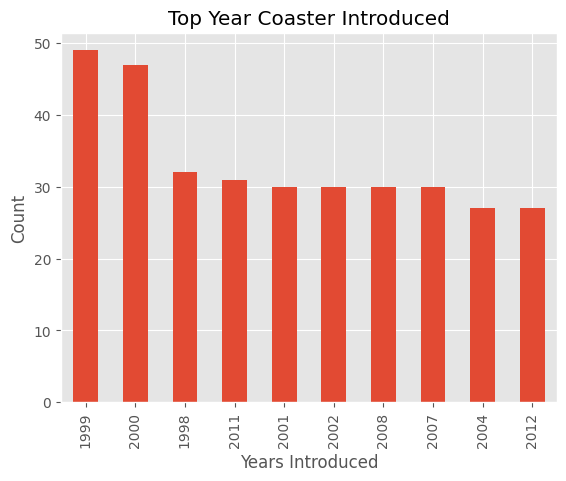

In [36]:
# df
# df['Year_Introduced'].value_counts() # checking number of time that year appeared
# df['Year_Introduced'].value_counts() \
# .head(10)
# df['Year_Introduced'].value_counts() \
#     .head(10) \
#     .plot()
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Year Coaster Introduced')
    # .plot(kind='barh', title='Top Year Coaster Introduced')
ax.set_xlabel('Years Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (Mph)')

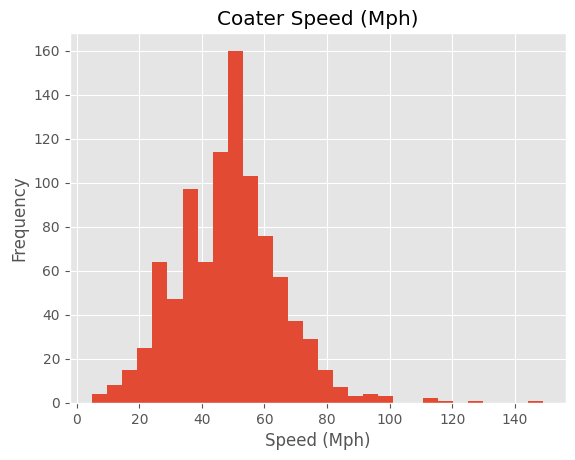

In [37]:
ax = df['Speed_Mph'].plot(kind='hist', bins=30, title='Coater Speed (Mph)')
# ax = df['speed1_value'].plot(kind='kde',title='Coater Speed Value')
ax.set_xlabel('Speed (Mph)')
# df.columns

### Step 4: Feature Relationship

. Scatterplot
. Heatmap Correlation
. PairPlot
. Groupby Comparison

<Axes: title={'center': 'Coaster Speed vs Height'}, xlabel='Speed_Mph', ylabel='height_ft'>

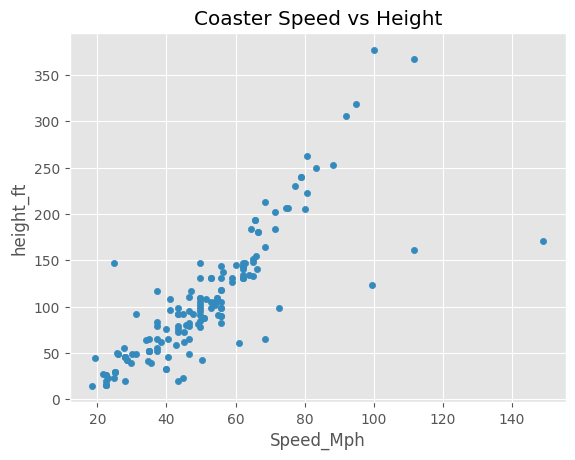

In [32]:
df.plot(kind='scatter', x='Speed_Mph', y='height_ft', title='Coaster Speed vs Height')
# plt.show()
# df.columns

<Axes: xlabel='Speed_Mph', ylabel='height_ft'>

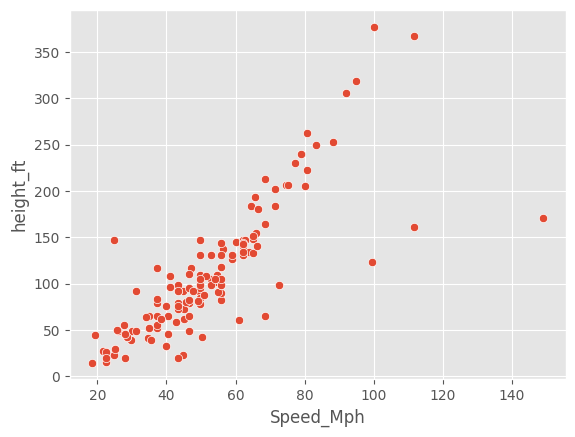

In [33]:
sns.scatterplot(x='Speed_Mph', y='height_ft', data=df)

<Axes: xlabel='Speed_Mph', ylabel='height_ft'>

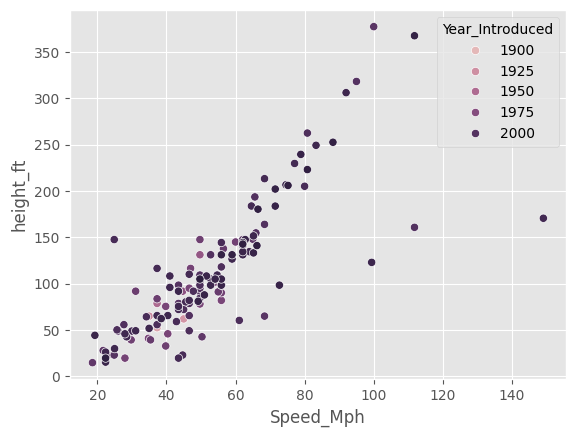

In [34]:
sns.scatterplot(x='Speed_Mph', y='height_ft', hue='Year_Introduced', data=df)

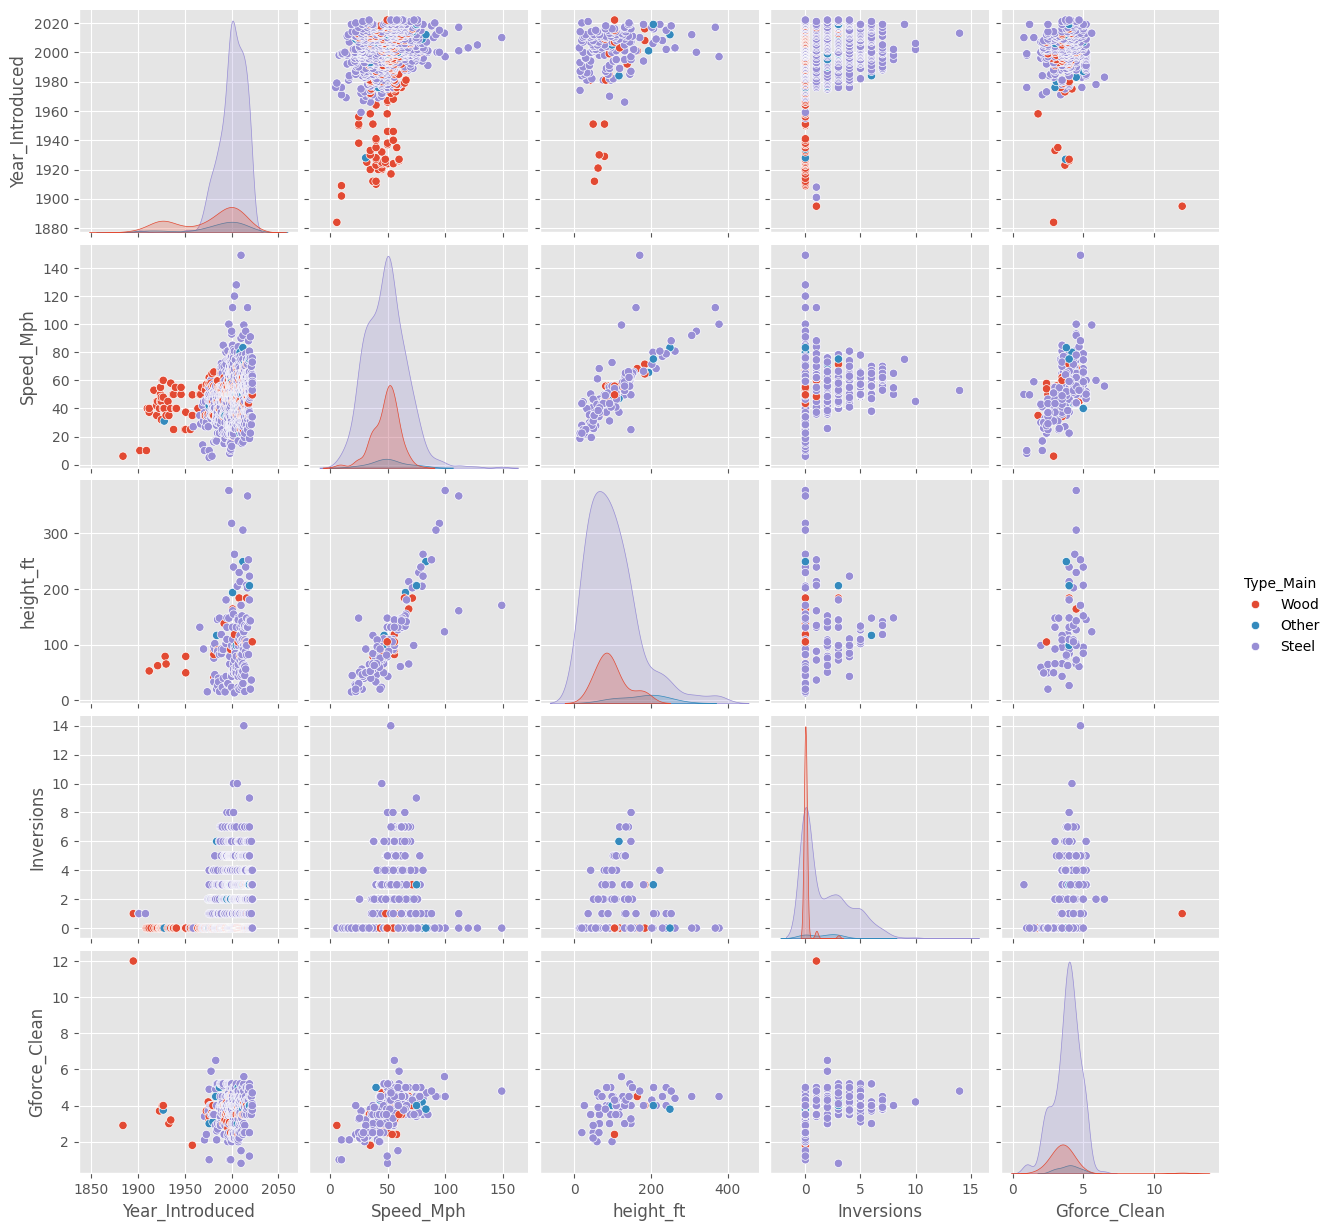

In [35]:
# sns.pairplot(df, vars=['Year_Introduced', 'Speed_Mph', 'height_ft', 'Inversions', 'Gforce_Clean'])

sns.pairplot(df, vars=['Year_Introduced', 'Speed_Mph', 'height_ft', 'Inversions', 'Gforce_Clean'], 
             hue='Type_Main')
plt.show()
# df.columns